In [3]:
pip install opencv-python

   ---------------------------------------- 0.0/39.5 MB ? eta -:--:--
   - -------------------------------------- 1.3/39.5 MB 9.5 MB/s eta 0:00:05
   -- ------------------------------------- 2.1/39.5 MB 5.9 MB/s eta 0:00:07
   --- ------------------------------------ 3.1/39.5 MB 5.9 MB/s eta 0:00:07
   --- ------------------------------------ 3.9/39.5 MB 5.5 MB/s eta 0:00:07
   ---- ----------------------------------- 4.7/39.5 MB 5.0 MB/s eta 0:00:07
   ----- ---------------------------------- 5.5/39.5 MB 4.7 MB/s eta 0:00:08
   ------ --------------------------------- 6.3/39.5 MB 4.6 MB/s eta 0:00:08
   ------- -------------------------------- 7.1/39.5 MB 4.4 MB/s eta 0:00:08
   ------- -------------------------------- 7.9/39.5 MB 4.4 MB/s eta 0:00:08
   -------- ------------------------------- 8.4/39.5 MB 4.4 MB/s eta 0:00:08
   --------- ------------------------------ 9.4/39.5 MB 4.2 MB/s eta 0:00:08
   ---------- ----------------------------- 10.2/39.5 MB 4.2 MB/s eta 0:00:08
   --

In [5]:
import numpy as np 
import pandas as pd 
import os

import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import keras
from keras.preprocessing import image
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten,Dense,Dropout,BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import cv2
from tensorflow.keras.applications import VGG16, InceptionResNetV2
from keras import regularizers
from tensorflow.keras.optimizers import Adam,RMSprop,SGD,Adamax

In [7]:
train_dir = r"E:\EX2\emotion\archive (2)" #passing the path with training images

In [9]:
img_size = 96 #original size of the image
epochs = 150
batch_size = 96
lr=0.001
seed=32
print(seed)

32


In [11]:

train_datagen = ImageDataGenerator(#rotation_range = 180,
                                         width_shift_range = 0.1,
                                         height_shift_range = 0.1,
                                         horizontal_flip = True,
                                         rescale = 1./255,
                                         #zoom_range = 0.2,
                                         validation_split = 0.2
                                        )
validation_datagen = ImageDataGenerator(rescale = 1./255,
                                         validation_split = 0.2)

In [13]:

train_generator = train_datagen.flow_from_directory(directory = train_dir,
                                                    target_size = (img_size,img_size),
                                                    batch_size = 64,
                                                    color_mode = "grayscale",
                                                    class_mode = "categorical",
                                                    subset = "training"
                                                   )
validation_generator = validation_datagen.flow_from_directory( directory = train_dir,
                                                              target_size = (img_size,img_size),
                                                              batch_size = 64,
                                                              color_mode = "grayscale",
                                                              class_mode = "categorical",
                                                              subset = "validation"
                                                             )

Found 788 images belonging to 7 classes.
Found 193 images belonging to 7 classes.


In [15]:
model= tf.keras.models.Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), padding='same', activation='relu', input_shape=(img_size, img_size,1)))
model.add(Conv2D(64,(3,3), padding='same', activation='relu' ))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128,(5,5), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
    
model.add(Conv2D(512,(3,3), padding='same', activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(512,(3,3), padding='same', activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten()) 
model.add(Dense(256,activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))
    
model.add(Dense(512,activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Dense(7, activation='softmax'))

model.compile(
    optimizer = Adam(0.001), 
    loss='categorical_crossentropy', 
    metrics=['accuracy']
  )
model.summary()

C:\Users\Lenovo\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 96, 96, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 96, 96, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 96, 96, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 48, 48, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 48, 48, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 48, 48, 128)         │         204,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 48, 48, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 24, 24, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 24, 24, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 24, 24, 512)         │         590,336 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 24, 24, 512)         │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 12, 12, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 12, 12, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 12, 12, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 12, 12, 512)         │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 6, 6, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 6, 6, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 18432)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │       4,718,848 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 8,035,847 (30.65 MB)

 Trainable params: 8,031,879 (30.64 MB)

 Non-trainable params: 3,968 (15.50 KB)

In [39]:
def compute_flops(model):
    tot_flops = 0

    for layer in model.layers:
        layertype = layer.__class__.__name__

        if layertype == "Dense":
            input_units = layer.input.shape[-1]
            output_units = layer.output.shape[-1]
            flops = 2 * input_units * output_units  # Multiplication & Addition FLOPs

        elif layertype == "Conv2D":
            _, h, w, in_channels = layer.input.shape
            kernel_h, kernel_w, _, out_channels = layer.kernel.shape
            flops = 2 * h * w * kernel_h * kernel_w * in_channels * out_channels  # Conv FLOPs

        else:
            flops = 0

        tot_flops += flops

    return tot_flops

# Compute and print FLOPs
total_flops = compute_flops(model)
print(f"Total FLOPs: {total_flops:,}")

Total FLOPs: 2,657,426,432


In [17]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

checkpoint = ModelCheckpoint(
    'model_optimal.keras',  # Use .keras extension here
    monitor='val_accuracy',
    save_best_only=True,
    verbose=1,
    mode='auto',
    save_weights_only=False
)

early_stopping = EarlyStopping(
    monitor='val_accuracy',
    patience=10,
    restore_best_weights=True
)



In [19]:
history = model.fit(x = train_generator,epochs = epochs,
                    validation_data = validation_generator,
                   callbacks=checkpoint)

Epoch 1/150


C:\Users\Lenovo\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.2541 - loss: 9.7787
Epoch 1: val_accuracy improved from -inf to 0.15544, saving model to model_optimal.keras
13/13 ━━━━━━━━━━━━━━━━━━━━ 64s 4s/step - accuracy: 0.2590 - loss: 9.7606 - val_accuracy: 0.1554 - val_loss: 9.4745
Epoch 2/150
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.4766 - loss: 9.0767
Epoch 2: val_accuracy did not improve from 0.15544
13/13 ━━━━━━━━━━━━━━━━━━━━ 49s 4s/step - accuracy: 0.4791 - loss: 9.0641 - val_accuracy: 0.0674 - val_loss: 10.9198
Epoch 3/150
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.5865 - loss: 8.3787
Epoch 3: val_accuracy did not improve from 0.15544
13/13 ━━━━━━━━━━━━━━━━━━━━ 48s 4s/step - accuracy: 0.5875 - loss: 8.3662 - val_accuracy: 0.0518 - val_loss: 14.1704
Epoch 4/150
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.6297 - loss: 7.6051
Epoch 4: val_accuracy did not improve from 0.15544
13/13 ━━━━━━━━━━━━━━━━━━━━ 49s 4s/step - accuracy: 0.6310 - loss: 7.5919 - val_accuracy

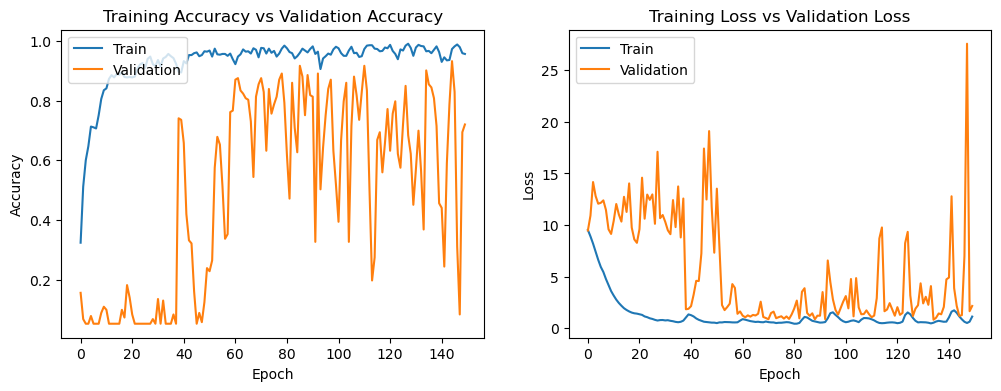

In [21]:
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
fig.set_size_inches(12,4)

ax[0].plot(history.history['accuracy'])
ax[0].plot(history.history['val_accuracy'])
ax[0].set_title('Training Accuracy vs Validation Accuracy')
ax[0].set_ylabel('Accuracy')
ax[0].set_xlabel('Epoch')
ax[0].legend(['Train', 'Validation'], loc='upper left')

ax[1].plot(history.history['loss'])
ax[1].plot(history.history['val_loss'])
ax[1].set_title('Training Loss vs Validation Loss')
ax[1].set_ylabel('Loss')
ax[1].set_xlabel('Epoch')
ax[1].legend(['Train', 'Validation'], loc='upper left')

plt.show()

In [23]:
from keras.models import load_model

model = load_model(r"E:\EX2\emotion\model_optimal.keras")

In [25]:
train_loss, train_acc = model.evaluate(train_generator)
test_loss, test_acc   = model.evaluate(validation_generator)
print("final train accuracy = {:.2f} , validation accuracy = {:.2f}".format(train_acc*100, test_acc*100))

13/13 ━━━━━━━━━━━━━━━━━━━━ 31s 2s/step - accuracy: 0.9837 - loss: 0.9724
4/4 ━━━━━━━━━━━━━━━━━━━━ 7s 1s/step - accuracy: 0.9220 - loss: 1.2298
final train accuracy = 98.35 , validation accuracy = 93.26


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 660ms/step
Predicted class: 2
Confidence scores: [1.0802433e-04 3.4069835e-05 9.9985588e-01 1.4323303e-09 4.5824427e-07
 1.1821020e-06 3.5729445e-07]
Predicted class name: disgust


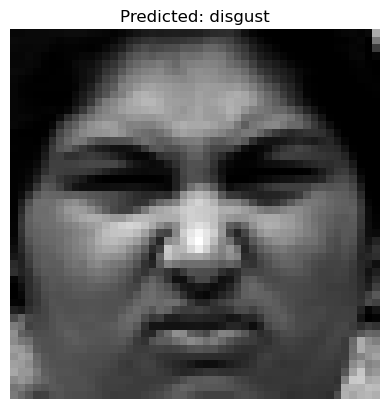

In [29]:
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

# Path to your image
img_path = r'E:\EX2\emotion\archive (2)\disgust\S005_001_00000009.png'  # Replace with the path to the image you want to predict

# Load and preprocess the image
img = image.load_img(img_path, target_size=(img_size, img_size), color_mode="grayscale")
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
img_array /= 255.0  # Normalize the image, as done during training

# Make a prediction
predictions = model.predict(img_array)
predicted_class = np.argmax(predictions, axis=1)[0]

# Print the output
print("Predicted class:", predicted_class)
print("Confidence scores:", predictions[0])  # Shows the confidence score for each class

# If you have class names, you can display the class name instead of the class index
class_names = ['anger', 'contempt', 'disgust', 'fear', 'happy', 'sadness', 'surprise']  # Replace with actual class names
predicted_class_name = class_names[predicted_class]
print("Predicted class name:", predicted_class_name)

# Display the image with the predicted class name
plt.imshow(img, cmap='gray')
plt.title(f"Predicted: {predicted_class_name}")
plt.axis('off')  # Turn off axis
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 365ms/step
Predicted class: 4
Confidence scores: [1.42530221e-09 1.13448216e-07 3.00385494e-08 2.86741386e-04
 9.99713123e-01 4.25565574e-08 1.85989939e-12]
Predicted class name: happy


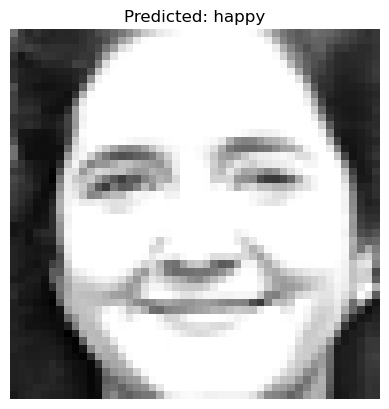

In [31]:
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

# Path to your image
img_path = r'E:\EX2\emotion\archive (2)\happy\S034_005_00000008.png'  # Replace with the path to the image you want to predict

# Load and preprocess the image
img = image.load_img(img_path, target_size=(img_size, img_size), color_mode="grayscale")
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
img_array /= 255.0  # Normalize the image, as done during training

# Make a prediction
predictions = model.predict(img_array)
predicted_class = np.argmax(predictions, axis=1)[0]

# Print the output
print("Predicted class:", predicted_class)
print("Confidence scores:", predictions[0])  # Shows the confidence score for each class

# If you have class names, you can display the class name instead of the class index
class_names = ['anger', 'contempt', 'disgust', 'fear', 'happy', 'sadness', 'surprise']  # Replace with actual class names
predicted_class_name = class_names[predicted_class]
print("Predicted class name:", predicted_class_name)

# Display the image with the predicted class name
plt.imshow(img, cmap='gray')
plt.title(f"Predicted: {predicted_class_name}")
plt.axis('off')  # Turn off axis
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step
Predicted class: 6
Confidence scores: [9.6712398e-08 1.1270879e-05 8.7001250e-04 5.3211204e-07 5.3522754e-08
 6.0530750e-05 9.9905759e-01]
Predicted class name: surprise


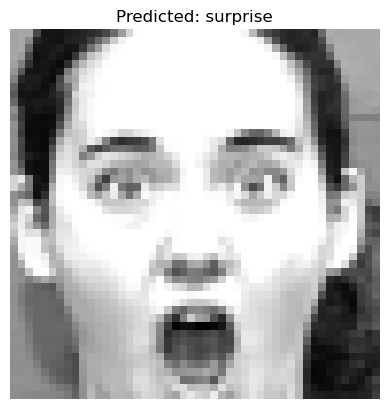

In [33]:
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

# Path to your image
img_path = r'E:\EX2\emotion\archive (2)\surprise\S035_001_00000014.png'  # Replace with the path to the image you want to predict

# Load and preprocess the image
img = image.load_img(img_path, target_size=(img_size, img_size), color_mode="grayscale")
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
img_array /= 255.0  # Normalize the image, as done during training

# Make a prediction
predictions = model.predict(img_array)
predicted_class = np.argmax(predictions, axis=1)[0]

# Print the output
print("Predicted class:", predicted_class)
print("Confidence scores:", predictions[0])  # Shows the confidence score for each class

# If you have class names, you can display the class name instead of the class index
class_names = ['anger', 'contempt', 'disgust', 'fear', 'happy', 'sadness', 'surprise']  # Replace with actual class names
predicted_class_name = class_names[predicted_class]
print("Predicted class name:", predicted_class_name)

# Display the image with the predicted class name
plt.imshow(img, cmap='gray')
plt.title(f"Predicted: {predicted_class_name}")
plt.axis('off')  # Turn off axis
plt.show()